# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari public repositories *Kaggle*.


2. **Deskripsi Dataset:**  
    Dataset yang digunakan adalah *Telco Customer Churn*. Dataset ini berisi informasi tentang pelanggan perusahaan telekomunikasi fiktif yang mencakup layanan yang mereka gunakan, informasi akun, dan demografi.

3. **Tujuan:**   
    Memprediksi apakah pelanggan akan berhenti berlangganan (Churn) atau tidak berdasarkan fitur-fitur yang ada.

**Link Dataset:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Sesuaikan path ini dengan lokasi file Anda relatif terhadap notebook
# Jika notebook ada di folder 'preprocessing', maka kita mundur satu langkah (..)
dataset_path = '../TelcoCustomerChurn_raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'

try:
    df = pd.read_csv(dataset_path)
    print("Dataset berhasil dimuat!")
    display(df.head())
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {dataset_path}. Mohon cek lokasi file.")

Dataset berhasil dimuat!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### a. Cek Informasi Umum (Tipe Data & Missing Values awal)

In [3]:
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

### b. Cek Statistik Deskriptif

In [4]:
print("\nStatistik Deskriptif:")
display(df.describe(include='all'))


Statistik Deskriptif:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


### c. Deteksi Masalah Khusus: Kolom TotalCharges terdeteksi Object padahal harusnya Float

In [5]:
empty_charges = df[df['TotalCharges'] == " "]
print(f"\nJumlah baris dengan TotalCharges kosong (spasi): {len(empty_charges)}")


Jumlah baris dengan TotalCharges kosong (spasi): 11


### d. Visualisasi Target (Churn)

C:\Users\lenov\AppData\Local\Temp\ipykernel_5304\2317888541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


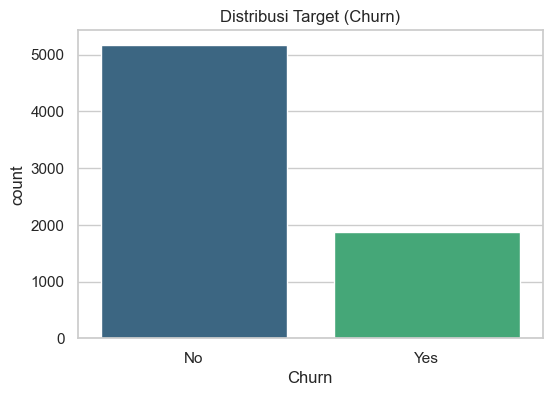

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Target (Churn)')
plt.show()

### 5. Cek Korelasi Fitur Numerik

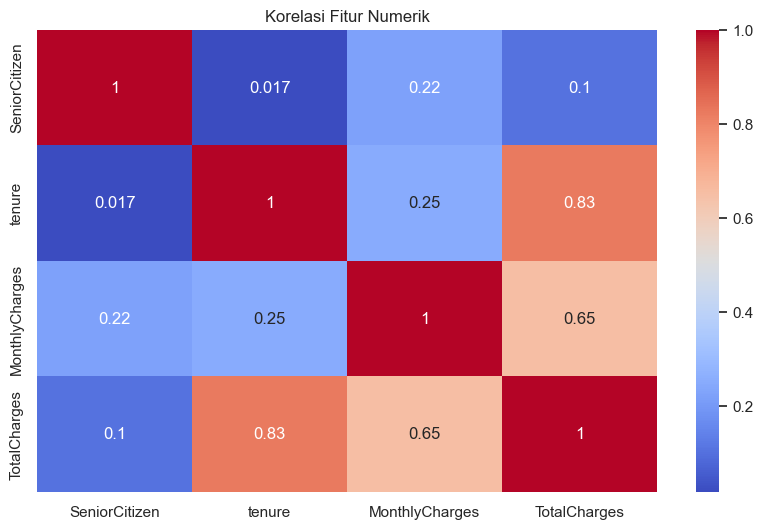

In [7]:
df_temp = df.copy()
df_temp['TotalCharges'] = pd.to_numeric(df_temp['TotalCharges'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.heatmap(df_temp.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### a. Menangani Data Kosong & Tipe Data Salah

In [8]:
# Mengubah TotalCharges dari Object ke Numeric. " " akan menjadi NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Mengisi NaN dengan 0 (Asumsi pelanggan baru masa langganan 0 bulan)
df['TotalCharges'].fillna(0, inplace=True)
print("TotalCharges berhasil diubah ke numerik.")

TotalCharges berhasil diubah ke numerik.


### b. Menghapus Kolom Tidak Penting

In [9]:
# customerID unik untuk setiap baris, tidak berguna untuk prediksi
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
print("Kolom customerID dihapus.")

Kolom customerID dihapus.


### c. Encoding Data Kategorikal

In [10]:
# Label Encoding untuk kolom Binary (Yes/No, Male/Female)
le = LabelEncoder()
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Gender kadang Male/Female, kita mapping manual atau pakai LE
if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

for col in binary_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# One-Hot Encoding untuk kolom kategori majemuk
# drop_first=True untuk menghindari multikolinearitas
df = pd.get_dummies(df, drop_first=True)

print(f"Dimensi data setelah encoding: {df.shape}")

Dimensi data setelah encoding: (7043, 31)


### d. Splitting Data (Train-Test Split)

In [11]:
X = df.drop('Churn', axis=1) # Fitur
y = df['Churn']              # Target

# Split 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data Train: {X_train.shape}, Data Test: {X_test.shape}")

Data Train: (5634, 30), Data Test: (1409, 30)


### e. Standarisasi/Scaling

In [12]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit hanya pada training set
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# Transform pada test set
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\nContoh 5 baris data latih yang sudah di-scale:")
display(X_train.head())


Contoh 5 baris data latih yang sudah di-scale:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,0,0,1,-0.465683,1,0,-0.000474,-0.419925,False,...,False,False,False,False,True,True,False,False,False,True
1623,0,0,0,0,0.885537,1,1,1.074754,1.256017,False,...,False,False,True,False,True,False,True,False,False,False
6074,1,0,1,0,-1.284605,0,1,-1.376499,-1.000283,True,...,False,False,False,False,False,False,False,False,True,False
1362,1,0,0,0,-1.161766,1,1,0.177346,-0.905497,False,...,False,False,False,False,False,False,False,False,True,False
6754,1,0,0,1,-1.325551,1,1,-0.098524,-1.010646,False,...,True,False,False,False,False,False,True,False,False,False


### f. Save Clean Dataset

In [13]:
X_train.to_csv('TelcoCustomerChurn_preprocessing/X_train.csv', index=False)
X_test.to_csv('TelcoCustomerChurn_preprocessing/X_test.csv', index=False)
y_train.to_csv('TelcoCustomerChurn_preprocessing/y_train.csv', index=False)
y_test.to_csv('TelcoCustomerChurn_preprocessing/y_test.csv', index=False)

print("Berhasil: Dataset hasil preprocessing sudah disimpan.")

Berhasil: Dataset hasil preprocessing sudah disimpan.
